# **Proyecto Final (Análisis multivariado)**
# ![](https://i.gifer.com/7ARb.gif)
Integrantes:


*   Esteban Nesci
*   Analía López
*   Alejandro Gómez Fernández
*   Rodrigo Robert

Proyecto: Análisis de sentimientos en Twitter: hepatitis.


In [ ]:
#Importamos los paquetes

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler 
import numpy as np 

In [ ]:
# Conexión con drive

#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Generamos el pandas dataframe

df=pd.read_csv('20220508_hepatitis.csv', low_memory=False)

In [ ]:
#Visualizamos dataset

df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1523479063272525824,1523479063272525824,2022-05-08 22:44:48 -03,2022-05-08,22:44:48,-300,49024508,onionweigher,Onion Weigher 🧅⚖️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1523479009694158848,1523418175878037504,2022-05-08 22:44:35 -03,2022-05-08,22:44:35,-300,2726837169,griffinjones25,GJ,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'stargazeruk7', 'name': 'Nata...",NaN,NaN,NaN,NaN
2,1523478947115139072,1523478947115139072,2022-05-08 22:44:20 -03,2022-05-08,22:44:20,-300,1452730505787551750,ideallyanews,IdeallyaNews,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1523478841125048320,1523418175878037504,2022-05-08 22:43:55 -03,2022-05-08,22:43:55,-300,2726837169,griffinjones25,GJ,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'stargazeruk7', 'name': 'Nata...",NaN,NaN,NaN,NaN
4,1523478649827078144,1523425745657245697,2022-05-08 22:43:09 -03,2022-05-08,22:43:09,-300,1467606239119089676,olganie35346372,Dine Nieves,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'GovPierluisi', 'name': 'Gobe...",NaN,NaN,NaN,NaN


In [ ]:
# Visualizamos caracteristicas de las columnas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               50002 non-null  int64  
 1   conversation_id  50002 non-null  int64  
 2   created_at       50002 non-null  object 
 3   date             50002 non-null  object 
 4   time             50002 non-null  object 
 5   timezone         50002 non-null  int64  
 6   user_id          50002 non-null  int64  
 7   username         50002 non-null  object 
 8   name             50001 non-null  object 
 9   place            34 non-null     object 
 10  tweet            50002 non-null  object 
 11  language         50002 non-null  object 
 12  mentions         50002 non-null  object 
 13  urls             50002 non-null  object 
 14  photos           50002 non-null  object 
 15  replies_count    50002 non-null  int64  
 16  retweets_count   50002 non-null  int64  
 17  likes_count 

In [ ]:
# Limpiamos los nulos

df.dropna(axis = 1, inplace=True)

In [ ]:
# Chequeamos la limpieza

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               50002 non-null  int64 
 1   conversation_id  50002 non-null  int64 
 2   created_at       50002 non-null  object
 3   date             50002 non-null  object
 4   time             50002 non-null  object
 5   timezone         50002 non-null  int64 
 6   user_id          50002 non-null  int64 
 7   username         50002 non-null  object
 8   tweet            50002 non-null  object
 9   language         50002 non-null  object
 10  mentions         50002 non-null  object
 11  urls             50002 non-null  object
 12  photos           50002 non-null  object
 13  replies_count    50002 non-null  int64 
 14  retweets_count   50002 non-null  int64 
 15  likes_count      50002 non-null  int64 
 16  hashtags         50002 non-null  object
 17  cashtags         50002 non-null

In [ ]:
# Tranformares los Id a variables categóricas para mejorar el uso de datos

df[['id', 'conversation_id', 'user_id']] = df[['id', 'conversation_id', 'user_id']].astype(str)

In [ ]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,tweet,language,...,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,video,reply_to
0,1523479063272525824,1523479063272525824,2022-05-08 22:44:48 -03,2022-05-08,22:44:48,-300,49024508,onionweigher,Tried to take my children to Chi-Chi's but it ...,en,...,[],0,0,0,[],[],https://twitter.com/onionweigher/status/152347...,False,0,[]
1,1523479009694158848,1523418175878037504,2022-05-08 22:44:35 -03,2022-05-08,22:44:35,-300,2726837169,griffinjones25,@stargazeruk7 Hep A like you mention is an ent...,en,...,[],0,0,0,[],[],https://twitter.com/griffinjones25/status/1523...,False,0,"[{'screen_name': 'stargazeruk7', 'name': 'Nata..."
2,1523478947115139072,1523478947115139072,2022-05-08 22:44:20 -03,2022-05-08,22:44:20,-300,1452730505787551750,ideallyanews,UK Health Safety Authority: No evidence linkin...,en,...,[],0,0,0,"['childhood', 'health', 'safety', 'uk']",[],https://twitter.com/IdeallyaNews/status/152347...,False,0,[]
3,1523478841125048320,1523418175878037504,2022-05-08 22:43:55 -03,2022-05-08,22:43:55,-300,2726837169,griffinjones25,@stargazeruk7 Autoimmune hepatitis cannot spre...,en,...,[],0,0,0,[],[],https://twitter.com/griffinjones25/status/1523...,False,0,"[{'screen_name': 'stargazeruk7', 'name': 'Nata..."
4,1523478649827078144,1523425745657245697,2022-05-08 22:43:09 -03,2022-05-08,22:43:09,-300,1467606239119089676,olganie35346372,@GovPierluisi La fé??? Usted sabe lo que es es...,es,...,[],0,0,0,[],[],https://twitter.com/OlgaNie35346372/status/152...,False,0,"[{'screen_name': 'GovPierluisi', 'name': 'Gobe..."


# ANALISIS

0    28099
1     7734
2     3407
3     1808
4     8954
Name: likes_count, dtype: int64


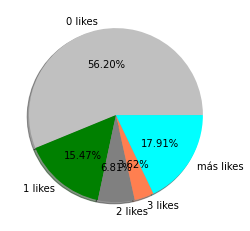

In [ ]:
# Grafico de tortas de likes modificado para que muestre los 4 mas importantes y al resto ...

likes_por2 = df['likes_count'].value_counts().sort_values(ascending=False)[:4]
likes_por2[4] = df['likes_count'].value_counts().sort_values(ascending=False)[4:].sum()
print (likes_por2)
colores = ['silver','green', 'grey','coral','cyan']
labels = ['0 likes','1 likes','2 likes', '3 likes','más likes']
plt.pie(x=likes_por2, colors = colores, autopct='%1.2f%%', shadow=True, labels=labels)

plt.show()

Como se ve, más de la mitad de los tweets no tienen likes, o tienen muy pocos. Entre 0,1 y 2 likes ocupan más de tres cuartos de la torta, de lo que se sigue que gran parte de los publicado no tiene tiene importancia para los otros usuarios.

0    37197
1     5250
2     2019
3     1234
4     4302
Name: retweets_count, dtype: int64


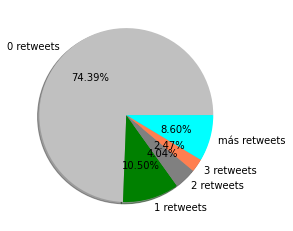

In [ ]:
# Grafico de tortas de retweets modificado para que muestre los 4 mas importantes y al resto ...

retweet_por2 = df['retweets_count'].value_counts().sort_values(ascending=False)[:4]
retweet_por2[4] = df['retweets_count'].value_counts().sort_values(ascending=False)[4:].sum()
print (retweet_por2)
colores = ['silver','green', 'grey','coral','cyan']
labels = ['0 retweets','1 retweets','2 retweets', '3 retweets','más retweets']
plt.pie(x=retweet_por2, colors = colores, autopct='%1.2f%%', shadow=True, labels=labels)

plt.show()

Con los retweets se agudiza la tendencia marcada anteriormente, 3/4 de la torta no tiene retweet.

0    36363
1     8963
2     2094
3      841
4     1741
Name: replies_count, dtype: int64


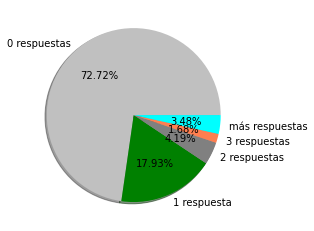

In [ ]:
# Grafico de tortas de respuestas modificado para que muestre los 4 mas importantes y al resto ...

replies_por2 = df['replies_count'].value_counts().sort_values(ascending=False)[:4]
replies_por2[4] = df['replies_count'].value_counts().sort_values(ascending=False)[4:].sum()
print (replies_por2)
colores = ['silver','green', 'grey','coral','cyan']
labels = ['0 respuestas','1 respuesta','2 respuestas', '3 respuestas','más respuestas']
plt.pie(x=replies_por2, colors = colores, autopct='%1.2f%%', shadow=True, labels=labels)

plt.show()

Mismo panorama que venimos describiendo anteriormente: el 72% de los tweets no tienen respuesta, solo el 17 tiene una respuesta.

**Para el análisis multivariado nos centraremos en los "hilos" con más intervenciones en el dataset**

In [ ]:
conv_id = df['conversation_id'].value_counts().sort_values(ascending=False)[:10]

In [ ]:
conv_id

1521106997395206144    232
1520979918452305920    158
1523050102298152960     95
1522190680826986496     83
1521185561658236930     77
1520283624225996801     71
1521077967178317825     66
1521514123967619073     65
1522635878056796162     60
1521440159426039808     57
Name: conversation_id, dtype: int64

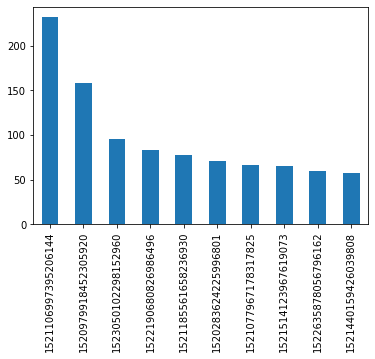

In [ ]:
# Graficamos las 10 conversaciones más importantes por likes

ax = conv_id.plot.bar(y='Likes', x='conversation id', rot=90)

**Realizaremos algunos cortes en los datos para constatar lo que venimos exponiendo:**

In [ ]:
# Corte a los 39000 tw, llegan hasta 2 likes

conv_id2 = df['conversation_id'].value_counts().sort_values(ascending=True)[:39000]
conv_id2

1521776121070571520    1
1522799175443877889    1
1522909111725158400    1
1522918994902241281    1
1523344206642937861    1
                      ..
1520335049840812033    2
1521491312519880711    2
1521801431069577217    2
1522008848466575360    2
1521100095801987072    2
Name: conversation_id, Length: 39000, dtype: int64

In [ ]:
# Corte entre 39k y 40k, pasan de 2 a 232 likes.

conv_id3 = df['conversation_id'].value_counts().sort_values(ascending=True)[39000:49000]
conv_id3

1521466769143046144      2
1521738653734604801      2
1520465397350338562      2
1522666488439750659      2
1523286545209257991      2
                      ... 
1521185561658236930     77
1522190680826986496     83
1523050102298152960     95
1520979918452305920    158
1521106997395206144    232
Name: conversation_id, Length: 2025, dtype: int64

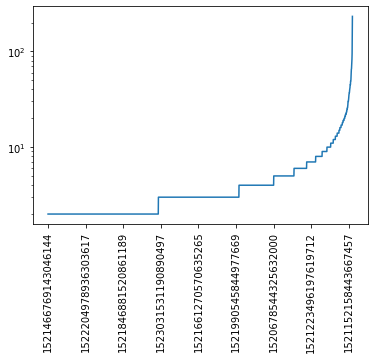

In [ ]:
# Graficamos logaritmicament el último corte para visualizar mejor el aumento exponencial de likes

ax2 = conv_id3.plot.line(y='Likes', x='conversation id', rot=90, logy=True)

In [ ]:
# Filtramos el dataset para trabajar con las 10 conversaciones más importantes

conv = df[df.conversation_id.isin(['1523050102298152960', '1522635878056796162','1522735443636363264', '1522960077023457280','1522986274365259780', '1523386087359787008','1522766337273171968', '1523162675571662848','1522505145392799744', '1522769843149287427'])]
conv.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,tweet,language,...,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,video,reply_to
35,1523475450365849602,1523386087359787008,2022-05-08 22:30:26 -03,2022-05-08,22:30:26,-300,1439204039695093766,sciencefirstok,@ZBasyouny @EckerleIsabella If it's an autoimm...,en,...,[],0,0,0,[],[],https://twitter.com/sciencefirstok/status/1523...,False,0,"[{'screen_name': 'ZBasyouny', 'name': 'Ziad Ba..."
56,1523472918692663297,1523386087359787008,2022-05-08 22:20:23 -03,2022-05-08,22:20:23,-300,1276275205673848838,zbasyouny,@EckerleIsabella There is an aspect of autoimm...,en,...,[],1,0,0,[],[],https://twitter.com/ZBasyouny/status/152347291...,False,0,"[{'screen_name': 'EckerleIsabella', 'name': 'I..."
74,1523469892996853762,1523386087359787008,2022-05-08 22:08:21 -03,2022-05-08,22:08:21,-300,224275126,mtshastawriter,@James69492913 @cbeyzad @EckerleIsabella Someo...,en,...,[],0,0,0,[],[],https://twitter.com/MtShastaWriter/status/1523...,False,0,"[{'screen_name': 'James69492913', 'name': 'JCH..."
126,1523464673030410241,1523162675571662848,2022-05-08 21:47:37 -03,2022-05-08,21:47:37,-300,1466932872946851841,esteban64690401,@elmundoes Criminales infelices!!! La hepatiti...,es,...,['https://pbs.twimg.com/media/FSRvC8tX0AA_zXI....,0,0,0,[],[],https://twitter.com/Esteban64690401/status/152...,False,1,"[{'screen_name': 'elmundoes', 'name': 'EL MUND..."
130,1523464443560038402,1523162675571662848,2022-05-08 21:46:42 -03,2022-05-08,21:46:42,-300,119591071,hipocratica33,"@elmundoes Ésta gente si es cínica, ""correlaci...",es,...,[],0,0,0,[],[],https://twitter.com/hipocratica33/status/15234...,False,0,"[{'screen_name': 'elmundoes', 'name': 'EL MUND..."


In [ ]:
# conv.shape() retorna un Tuple asi: (filas, col)
print('Este dataset tiene ' + str(conv.shape[0]) + ' filas, y ' + str(conv.shape[1]) + ' columnas.')
conv.shape

Este dataset tiene 425 filas, y 22 columnas.


(425, 22)

<AxesSubplot:xlabel='Count', ylabel='conversation_id'>

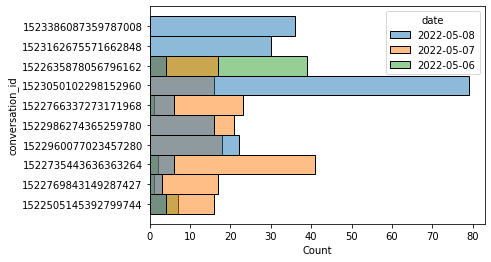

In [ ]:
#Visualizar las conversaciones más relevantes por día

sns.histplot(data = conv, y='conversation_id', hue='date')

La conversación más importante fue el día 08/05, es el hilo: *960, con 80 tweets ese día.

La seguda conversación más importante fue el día 07/05, es el hilo: *264, con 50 tweets aprox.

La tercera conversación más importante fue el día 06/05, es el hilo: *162, con 40 tweets aprox.


<AxesSubplot:xlabel='Count', ylabel='conversation_id'>

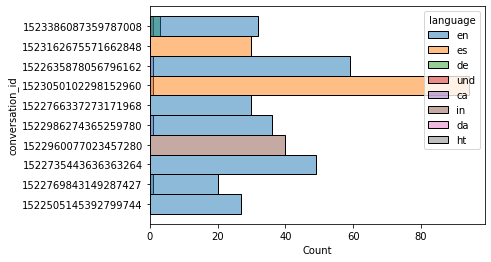

In [ ]:
#Visualizar las conversaciones más relevantes por idioma

sns.histplot(data = conv, y='conversation_id', hue='language')

Se puede ver qe la mayoría de los hilos son en inglés, como habiamos visto en en los análisis anteriores, sin embargo el hilo más importante es en español, ganándole al inglés y al indi que eran los más numerosos en términos absolutos.

### Las escalas horizontales que representan cantidades en los siguientes graficos, son escalas logaritmicas

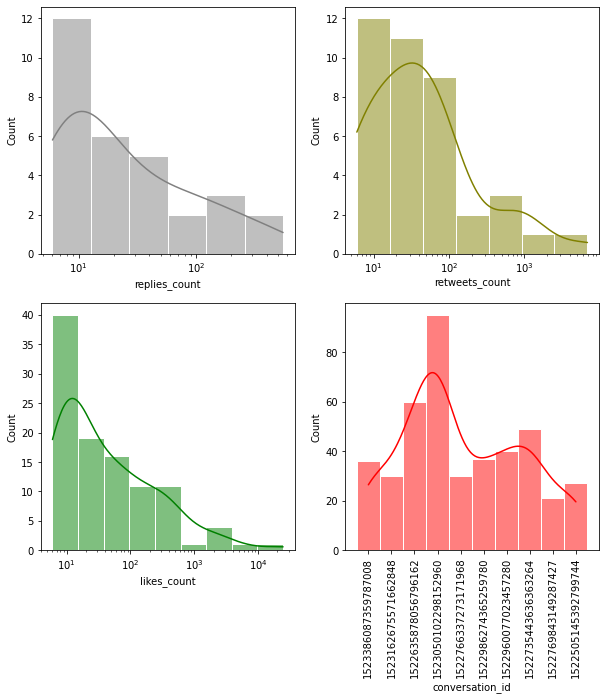

In [ ]:
ig, axs = plt.subplots(2, 2, figsize=(10, 10))
plt.grid()
sns.set_style("ticks",{'axes.grid' : True})
#sns.set_style("darkgrid")
sns.histplot(data=conv[conv['likes_count'] > 5], x="likes_count", kde=True, color="green", ax=axs[1, 0], log_scale=True)
sns.histplot(data=conv[conv['replies_count'] > 5], x="replies_count", kde=True, color="gray", ax=axs[0, 0], log_scale=True)
sns.histplot(data=conv[conv['retweets_count'] > 5], x="retweets_count", kde=True, color="olive", ax=axs[0, 1], log_scale=True)
sns.histplot(data=conv, x="conversation_id", kde=True, color="red", ax=axs[1, 1])
plt.xticks(rotation=90)
plt.grid()
plt.show()

Podemos ver cómo de manera comparativa se comprueba lo visto más arriba: la cantidad de tweets con pocos likes, retweets y respuestas son muchos. La diferencia con el primer análisis es que esta comparativa ahora está realizada sobre las 10 conversaciones más largas.

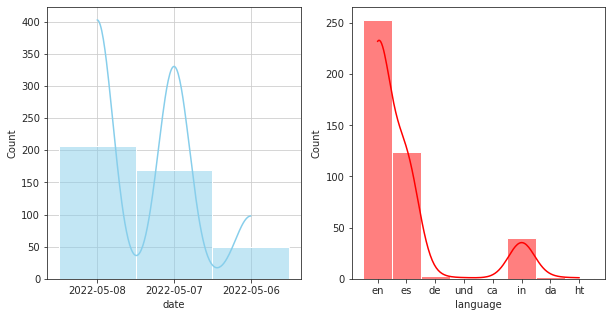

In [ ]:
# Visualizamos ahora de manera desagregada, cantida de tweets

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=conv, x="date", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=conv, x="language", kde=True, color="red", ax=axs[1])
plt.grid()
plt.show()

In [ ]:
# Vizualizamos lo mismo que en otros gráficos
# pero la diferencia es que este gráfico es interactivo
# y se pueden ver mejor algunos detalles que en lo otros gráficos se pierden

fig = px.scatter(y=conv["likes_count"], x=conv["conversation_id"],log_y=True)
fig.show()

In [ ]:
#Vizualizamos en simultaneo: hilos, idioma, cantidad de likes y el tamaño del círculo según la cantidad de respuetas

fig = px.scatter(conv, y=conv["likes_count"], x=conv["conversation_id"], color=conv['language'], size='replies_count', log_y=True)
fig.show()

In [ ]:
#Vizualizamos en simultaneo: hilos, idioma, cantidad de likes y el tamaño del círculo según la cantidad de respuetas

fig = px.scatter(conv, y=conv["likes_count"], x=conv["conversation_id"], color=conv['date'], size='retweets_count', log_y=True)
fig.show()

In [ ]:
#Vizualizamos likes, retweets y conversación en 3d coloreado por día

fig = px.scatter_3d(conv, y="likes_count", x="conversation_id", z='retweets_count', color='date')
fig.show()

In [ ]:
#Para visualizarmejor las tres variables más correlacionadas, normalizaremos el df
# y lo graficaremos en escala logaritmica

norm = pd.DataFrame()
norm = conv[['conversation_id','replies_count','retweets_count', 'likes_count']]

In [ ]:
# Función de normalización

def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

In [ ]:
# Aplicamos la normalización a las 3 columnas que necesitamos

df_mean_norm = mean_norm(norm[['replies_count','retweets_count', 'likes_count']])
print(df_mean_norm)

       replies_count  retweets_count  likes_count
35         -0.154412       -0.080962    -0.090071
56         -0.125540       -0.080962    -0.090071
74         -0.154412       -0.080962    -0.090071
126        -0.154412       -0.080962    -0.090071
130        -0.154412       -0.080962    -0.090071
...              ...             ...          ...
14435       3.598887        2.587947     1.557582
14669       0.018817       -0.034087     0.030925
14902      -0.067797       -0.075102    -0.057589
15656      -0.010054       -0.072173    -0.025919
17953       1.982081        2.303771     1.472316

[425 rows x 3 columns]


In [ ]:
# Graficamos el resultado:

fig2 = px.scatter_3d(norm, y="likes_count", x="replies_count", z='retweets_count', log_x=True, log_y=True, log_z=True, color='conversation_id')
fig2.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1678f438-dd57-41c5-b88b-bfcde7b7ccb5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>